In [1]:
#IMPORTING DATASET(.CSV) INTO PANDAS DATAFRAME
import alt as alt
import pandas as pd

dataset1 = pd.read_csv('01_april_30_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset1.columns = map(str.upper, dataset1.columns)

dataset2 = pd.read_csv('02_May_12_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')

dataset3 = pd.read_csv('03_june_9_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset3.columns = map(str.upper, dataset3.columns)

#Selected Features
selected_features = ['SOC1','SOC2A','SOC2B','SOC3A','SOC3B','SOC4A','SOC4B',
                      'SOC5A','SOC5B','SOC5C','SOC5D','SOC5E',
                      'PHYS1A','PHYS1B','PHYS1C','PHYS1D','PHYS1E','PHYS1F','PHYS1G','PHYS1H','PHYS1I','PHYS1J','PHYS1K','PHYS1L','PHYS1M','PHYS1N','PHYS1O','PHYS1P','PHYS1Q',
                      'PHYS2_1','PHYS2_2','PHYS2_3','PHYS2_4','PHYS2_5','PHYS2_6','PHYS2_7','PHYS2_8','PHYS2_9','PHYS2_10','PHYS2_11','PHYS2_12','PHYS2_13','PHYS2_14','PHYS2_15','PHYS2_16','PHYS2_17','PHYS2_18','PHYS2_19',
                      'PHYS7_1','PHYS7_2','PHYS7_3','PHYS7_4',
                      'PHYS8',
                      'PHYS10A','PHYS10B','PHYS10C','PHYS10D','PHYS10E',
                      'AGE7','GENDER','RACETH','ECON4A','ECON4B','HHINCOME','EDUCATION','HHSIZE1','HH_BANNER',
                      ]


df1 = dataset1[selected_features]
df1.dropna(inplace=True)
df2 = dataset2[selected_features]
df2.dropna(inplace=True)
df3 = dataset3[selected_features]
df3.dropna(inplace=True)

df = df1.append(df2,ignore_index = True).append(df3,ignore_index = True)
# df.isna().sum()

#Exporting Selected Features from datasets
from pathlib import Path

filepath1 = Path('C:\python\df1.csv')
filepath1.parent.mkdir(parents=True, exist_ok=True)
df1.to_csv(filepath1)

filepath2 = Path('C:\python\df2.csv')
filepath2.parent.mkdir(parents=True, exist_ok=True)
df2.to_csv(filepath2)

filepath3 = Path('C:\python\df3.csv')
filepath3.parent.mkdir(parents=True, exist_ok=True)
df3.to_csv(filepath3)

filepath = Path('C:\python\df.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_23220\919149335.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_23220\919149335.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_23220\919149335.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)
C:\User

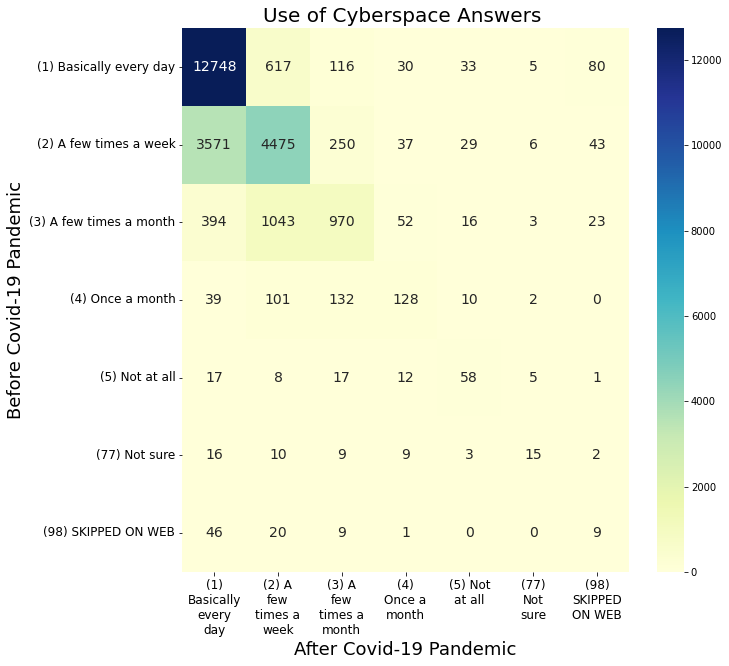

In [2]:
#SE1: Changes in Social Relationships Before(SOC2B) and After(SOC2A) Covid Pandemic
import matplotlib.pyplot as plt
import seaborn as sns

import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

SE1 = pd.crosstab(df['SOC3B'],
                  df['SOC3A'],
                 margins = False)

fig, ax = plt.subplots(figsize=(10, 10))
s= sns.heatmap(SE1, annot=True,fmt='g',annot_kws={"size": 14},cmap="YlGnBu")
# s.set(xlabel='Social Relationships (After Covid Pandemic)', ylabel='Social Relationships (Before Covid Pandemic')
s.axes.set_title("Use of Cyberspace Answers ",fontsize=20)
s.set_xlabel("After Covid-19 Pandemic",fontsize=18)
s.set_ylabel("Before Covid-19 Pandemic",fontsize=18)
s.set_xticklabels(s.get_xmajorticklabels(), fontsize = 12 , rotation=45)
s.set_yticklabels(s.get_ymajorticklabels(), fontsize = 12 )
wrap_labels(s, 7)
s.figure
# s.set_xyicklabels(s.get_jmajorticklabels(), fontsize = 14,rotation=45)
plt.savefig("C:\python\SE03-CROS.jpeg",
            format='jpeg',
            dpi=300,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

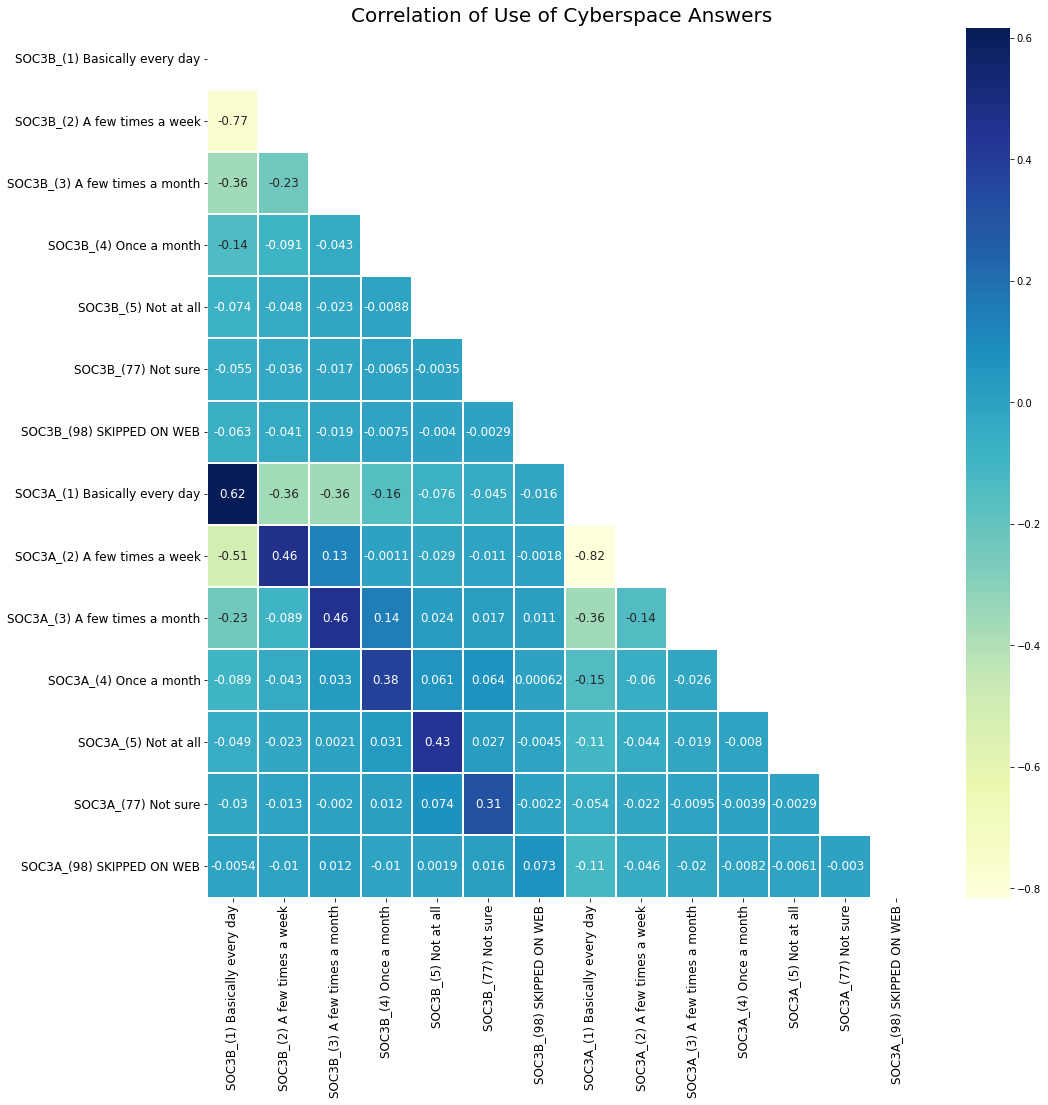

In [3]:
import numpy as np
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

SE1 = pd.get_dummies(df[['SOC3B','SOC3A']])
plt.figure(figsize=(16,16))

SE1_CORR = SE1.corr()
matrix = np.triu(SE1_CORR)
s=sns.heatmap(SE1_CORR,linewidths=.1,cmap="YlGnBu", annot=True, mask=matrix,annot_kws={"size": 12})
s.set_xticklabels(s.get_xmajorticklabels(), fontsize = 12 , rotation=90)
s.set_yticklabels(s.get_ymajorticklabels(), fontsize = 12)
s.axes.set_title("Correlation of Use of Cyberspace Answers ",fontsize=20)
# wrap_labels(s, 4)
# plt.yticks(rotation=0);
plt.savefig("C:\python\SE03-CORS.jpeg",
            format='jpeg',
            dpi=300,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

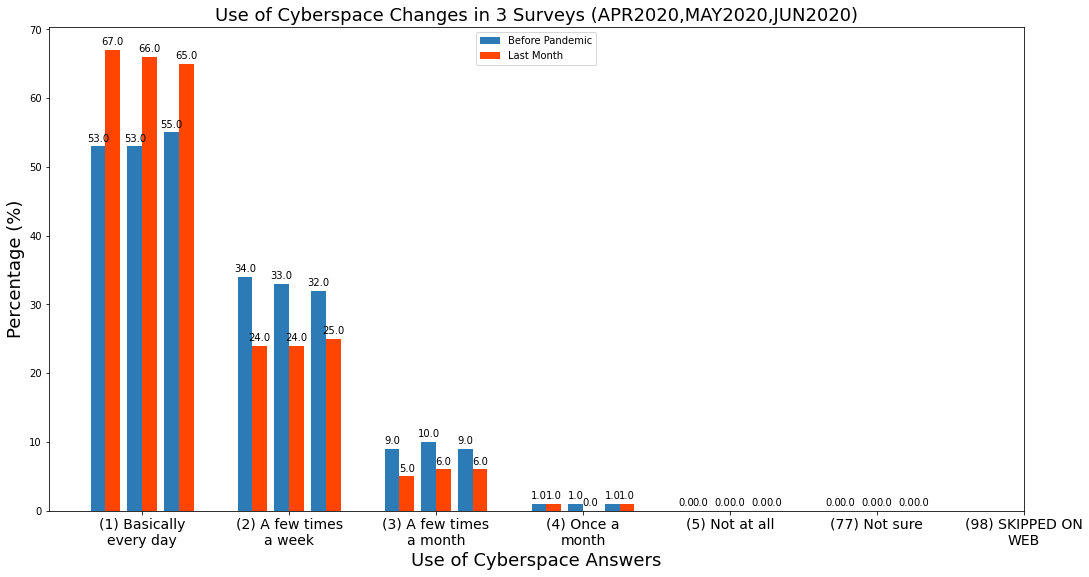

In [4]:
se1_1=df1[['SOC3B','SOC3A']]


data1B=se1_1['SOC3B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['SOC3A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['SOC3B','SOC3A']]
data2B=se1_2['SOC3B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['SOC3A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['SOC3B','SOC3A']]
data3B=se1_3['SOC3B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['SOC3A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)

x= data1.iloc[: , 1:]*100
x= x.astype(float).astype(int)
# x=int(x)
# df['col'] = df['col'].str.split('.').str[0]
# x.astype(int)
data1 = pd.concat([data1B['unique_values'],x], axis = 1)


import matplotlib.pyplot as plt
import numpy as np

labels = data1['unique_values']
APR_BEFORE_PANDEMIC = data1['april_before']
APR_LAST_MONTH = data1['april_after']
MAY_BEFORE_PANDEMIC = data1['may_before']
MAY_LAST_MONTH = data1['may_after']
JUN_BEFORE_PANDEMIC = data1['june_before']
JUN_LAST_MONTH = data1['june_after']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width*3 , APR_BEFORE_PANDEMIC, width,color='#2C7BB6', label='Before Pandemic')
rects2 = ax.bar(x - width*2, APR_LAST_MONTH, width,color='#FF4500', label='Last Month')
rects3 = ax.bar(x - width/2 , MAY_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects4 = ax.bar(x + width/2, MAY_LAST_MONTH, width,color='#FF4500')
rects5 = ax.bar(x + width*2, JUN_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects6 = ax.bar(x + width*3, JUN_LAST_MONTH, width,color='#FF4500')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage (%)',fontsize=18)
ax.set_xlabel('Use of Cyberspace Answers',fontsize=18)
ax.set_title('Use of Cyberspace Changes in 3 Surveys (APR2020,MAY2020,JUN2020)',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
wrap_labels(ax, 15)

fig.tight_layout()
plt.xticks(fontsize=14)
# plt.xticks(fontsize=7 , rotation=45)
plt.show()

fig.savefig('C:\python\SE03-BARS.png',format='jpeg', dpi=300)

In [29]:
data1=data1.iloc[: , 1:].astype(int)
# x= data1.iloc[: , 1:]
# x= x.astype(int)
# x.iloc[: , 1:]

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [30]:
data1

,unique_values,april_before,april_after,may_before,may_after,june_before,june_after
0,(1) Basically every day,53.0,67.0,53.0,66.0,55.0,65.0
1,(2) A few times a week,34.0,24.0,33.0,24.0,32.0,25.0
2,(3) A few times a month,9.0,5.0,10.0,6.0,9.0,6.0
3,(4) Once a month,1.0,1.0,1.0,0.0,1.0,1.0
4,(5) Not at all,0.0,0.0,0.0,0.0,0.0,0.0
5,(77) Not sure,0.0,0.0,0.0,0.0,0.0,0.0
6,(98) SKIPPED ON WEB,NaN,NaN,NaN,NaN,NaN,NaN
